In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
tensorflow.keras.__version__
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
X = df.drop("koi_disposition", axis=1)
# y = exoplanet_df["koi_disposition_CONFIRMED"].values.reshape(-1, 1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(8744, 40) (8744,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [5]:
X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


# Pre-processing

Scale the data using the MinMaxScaler

In [6]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding for creating the "y" values into binary as required for deep learning
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical
# X_train_scaled.shape

C:\Users\aa11717\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Create a Deep Learning Model

In [7]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 14,503
Trainable params: 14,503
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 1s - loss: 0.5216 - acc: 0.7342
Epoch 2/1000
 - 0s - loss: 0.3661 - acc: 0.8156
Epoch 3/1000
 - 0s - loss: 0.3529 - acc: 0.8245
Epoch 4/1000
 - 0s - loss: 0.3471 - acc: 0.8262
Epoch 5/1000
 - 0s - loss: 0.3365 - acc: 0.8390
Epoch 6/1000
 - 0s - loss: 0.3308 - acc: 0.8417
Epoch 7/1000
 - 0s - loss: 0.3236 - acc: 0.8472
Epoch 8/1000
 - 0s - loss: 0.3262 - acc: 0.8475
Epoch 9/1000
 - 0s - loss: 0.3130 - acc: 0.8538
Epoch 10/1000
 - 0s - loss: 0.3082 - acc: 0.8635
Epoch 11/1000
 - 0s - loss: 0.3070 - acc: 0.8602
Epoch 12/1000
 - 0s - loss: 0.3068 - acc: 0.8623
Epoch 13/1000
 - 0s - loss: 0.3018 - acc: 0.8609
Epoch 14/1000
 - 0s - loss: 0.3049 - acc: 0.8625
Epoch 15/1000
 - 0s - loss: 0.2947 - acc: 0.8646
Epoch 16/1000
 - 0s - loss: 0.2899 - acc: 0.8676
Epoch 17/1000
 - 0s - loss: 0.2852 - acc: 0.8760
Epoch 18/1000
 - 0s - loss: 0.2857 - acc: 0.8725
Epoch 19/1000
 - 0s - loss: 0.2848 - acc: 0.8737
Epoch 20/1000
 - 0s - loss: 0.

 - 1s - loss: 0.1884 - acc: 0.9175
Epoch 162/1000
 - 1s - loss: 0.1941 - acc: 0.9172
Epoch 163/1000
 - 0s - loss: 0.1925 - acc: 0.9146
Epoch 164/1000
 - 0s - loss: 0.1938 - acc: 0.9174
Epoch 165/1000
 - 1s - loss: 0.1871 - acc: 0.9193
Epoch 166/1000
 - 1s - loss: 0.1872 - acc: 0.9169
Epoch 167/1000
 - 0s - loss: 0.1879 - acc: 0.9183
Epoch 168/1000
 - 0s - loss: 0.1894 - acc: 0.9126
Epoch 169/1000
 - 0s - loss: 0.1879 - acc: 0.9183
Epoch 170/1000
 - 0s - loss: 0.1915 - acc: 0.9146
Epoch 171/1000
 - 0s - loss: 0.1819 - acc: 0.9219
Epoch 172/1000
 - 0s - loss: 0.1896 - acc: 0.9190
Epoch 173/1000
 - 0s - loss: 0.1888 - acc: 0.9166
Epoch 174/1000
 - 1s - loss: 0.1854 - acc: 0.9216
Epoch 175/1000
 - 0s - loss: 0.1824 - acc: 0.9193
Epoch 176/1000
 - 1s - loss: 0.1852 - acc: 0.9190
Epoch 177/1000
 - 0s - loss: 0.1894 - acc: 0.9167
Epoch 178/1000
 - 0s - loss: 0.1842 - acc: 0.9187
Epoch 179/1000
 - 0s - loss: 0.1830 - acc: 0.9224
Epoch 180/1000
 - 0s - loss: 0.1859 - acc: 0.9187
Epoch 181/1000


 - 0s - loss: 0.1293 - acc: 0.9440
Epoch 326/1000
 - 0s - loss: 0.1448 - acc: 0.9366
Epoch 327/1000
 - 0s - loss: 0.1374 - acc: 0.9405
Epoch 328/1000
 - 0s - loss: 0.1303 - acc: 0.9431
Epoch 329/1000
 - 0s - loss: 0.1315 - acc: 0.9443
Epoch 330/1000
 - 0s - loss: 0.1320 - acc: 0.9454
Epoch 331/1000
 - 0s - loss: 0.1329 - acc: 0.9440
Epoch 332/1000
 - 0s - loss: 0.1388 - acc: 0.9404
Epoch 333/1000
 - 0s - loss: 0.1491 - acc: 0.9385
Epoch 334/1000
 - 0s - loss: 0.1349 - acc: 0.9410
Epoch 335/1000
 - 0s - loss: 0.1292 - acc: 0.9443
Epoch 336/1000
 - 0s - loss: 0.1263 - acc: 0.9477
Epoch 337/1000
 - 0s - loss: 0.1254 - acc: 0.9468
Epoch 338/1000
 - 0s - loss: 0.1311 - acc: 0.9443
Epoch 339/1000
 - 0s - loss: 0.1281 - acc: 0.9463
Epoch 340/1000
 - 0s - loss: 0.1304 - acc: 0.9424
Epoch 341/1000
 - 0s - loss: 0.1304 - acc: 0.9414
Epoch 342/1000
 - 0s - loss: 0.1331 - acc: 0.9431
Epoch 343/1000
 - 0s - loss: 0.1299 - acc: 0.9465
Epoch 344/1000
 - 0s - loss: 0.1329 - acc: 0.9433
Epoch 345/1000


 - 0s - loss: 0.0861 - acc: 0.9652
Epoch 490/1000
 - 0s - loss: 0.0941 - acc: 0.9620
Epoch 491/1000
 - 0s - loss: 0.0928 - acc: 0.9633
Epoch 492/1000
 - 0s - loss: 0.0864 - acc: 0.9663
Epoch 493/1000
 - 0s - loss: 0.0881 - acc: 0.9645
Epoch 494/1000
 - 0s - loss: 0.0876 - acc: 0.9643
Epoch 495/1000
 - 0s - loss: 0.0894 - acc: 0.9651
Epoch 496/1000
 - 0s - loss: 0.0930 - acc: 0.9643
Epoch 497/1000
 - 0s - loss: 0.0929 - acc: 0.9611
Epoch 498/1000
 - 0s - loss: 0.0856 - acc: 0.9658
Epoch 499/1000
 - 0s - loss: 0.0995 - acc: 0.9591
Epoch 500/1000
 - 0s - loss: 0.0976 - acc: 0.9611
Epoch 501/1000
 - 0s - loss: 0.0856 - acc: 0.9665
Epoch 502/1000
 - 0s - loss: 0.0840 - acc: 0.9672
Epoch 503/1000
 - 0s - loss: 0.0798 - acc: 0.9687
Epoch 504/1000
 - 0s - loss: 0.0831 - acc: 0.9654
Epoch 505/1000
 - 0s - loss: 0.0840 - acc: 0.9675
Epoch 506/1000
 - 0s - loss: 0.0814 - acc: 0.9678
Epoch 507/1000
 - 0s - loss: 0.0882 - acc: 0.9666
Epoch 508/1000
 - 0s - loss: 0.0942 - acc: 0.9637
Epoch 509/1000


 - 0s - loss: 0.0555 - acc: 0.9796
Epoch 654/1000
 - 0s - loss: 0.0574 - acc: 0.9771
Epoch 655/1000
 - 0s - loss: 0.0640 - acc: 0.9733
Epoch 656/1000
 - 0s - loss: 0.0558 - acc: 0.9799
Epoch 657/1000
 - 0s - loss: 0.0537 - acc: 0.9800
Epoch 658/1000
 - 0s - loss: 0.0669 - acc: 0.9716
Epoch 659/1000
 - 0s - loss: 0.0712 - acc: 0.9721
Epoch 660/1000
 - 0s - loss: 0.0627 - acc: 0.9744
Epoch 661/1000
 - 0s - loss: 0.0510 - acc: 0.9808
Epoch 662/1000
 - 0s - loss: 0.0605 - acc: 0.9741
Epoch 663/1000
 - 0s - loss: 0.0498 - acc: 0.9814
Epoch 664/1000
 - 0s - loss: 0.0581 - acc: 0.9779
Epoch 665/1000
 - 0s - loss: 0.0698 - acc: 0.9706
Epoch 666/1000
 - 0s - loss: 0.0517 - acc: 0.9811
Epoch 667/1000
 - 0s - loss: 0.0563 - acc: 0.9790
Epoch 668/1000
 - 0s - loss: 0.0752 - acc: 0.9715
Epoch 669/1000
 - 0s - loss: 0.0586 - acc: 0.9738
Epoch 670/1000
 - 0s - loss: 0.0510 - acc: 0.9799
Epoch 671/1000
 - 0s - loss: 0.0511 - acc: 0.9794
Epoch 672/1000
 - 0s - loss: 0.0636 - acc: 0.9739
Epoch 673/1000


 - 0s - loss: 0.0384 - acc: 0.9858
Epoch 818/1000
 - 0s - loss: 0.0334 - acc: 0.9880
Epoch 819/1000
 - 1s - loss: 0.0367 - acc: 0.9881
Epoch 820/1000
 - 1s - loss: 0.0317 - acc: 0.9899
Epoch 821/1000
 - 0s - loss: 0.0383 - acc: 0.9860
Epoch 822/1000
 - 0s - loss: 0.0449 - acc: 0.9814
Epoch 823/1000
 - 0s - loss: 0.0344 - acc: 0.9866
Epoch 824/1000
 - 0s - loss: 0.0317 - acc: 0.9901
Epoch 825/1000
 - 0s - loss: 0.0336 - acc: 0.9884
Epoch 826/1000
 - 0s - loss: 0.0375 - acc: 0.9863
Epoch 827/1000
 - 0s - loss: 0.0414 - acc: 0.9829
Epoch 828/1000
 - 0s - loss: 0.0362 - acc: 0.9867
Epoch 829/1000
 - 0s - loss: 0.0385 - acc: 0.9863
Epoch 830/1000
 - 0s - loss: 0.0432 - acc: 0.9822
Epoch 831/1000
 - 0s - loss: 0.0349 - acc: 0.9878
Epoch 832/1000
 - 0s - loss: 0.0356 - acc: 0.9855
Epoch 833/1000
 - 0s - loss: 0.0361 - acc: 0.9863
Epoch 834/1000
 - 0s - loss: 0.0374 - acc: 0.9849
Epoch 835/1000
 - 0s - loss: 0.0360 - acc: 0.9875
Epoch 836/1000
 - 0s - loss: 0.0572 - acc: 0.9745
Epoch 837/1000


 - 0s - loss: 0.0180 - acc: 0.9956
Epoch 982/1000
 - 1s - loss: 0.0167 - acc: 0.9954
Epoch 983/1000
 - 0s - loss: 0.0296 - acc: 0.9886
Epoch 984/1000
 - 0s - loss: 0.0300 - acc: 0.9889
Epoch 985/1000
 - 0s - loss: 0.0308 - acc: 0.9899
Epoch 986/1000
 - 0s - loss: 0.0804 - acc: 0.9712
Epoch 987/1000
 - 0s - loss: 0.0380 - acc: 0.9858
Epoch 988/1000
 - 0s - loss: 0.0173 - acc: 0.9948
Epoch 989/1000
 - 1s - loss: 0.0165 - acc: 0.9959
Epoch 990/1000
 - 0s - loss: 0.0188 - acc: 0.9944
Epoch 991/1000
 - 0s - loss: 0.0223 - acc: 0.9925
Epoch 992/1000
 - 0s - loss: 0.0302 - acc: 0.9889
Epoch 993/1000
 - 0s - loss: 0.0209 - acc: 0.9934
Epoch 994/1000
 - 0s - loss: 0.0361 - acc: 0.9867
Epoch 995/1000
 - 0s - loss: 0.0297 - acc: 0.9893
Epoch 996/1000
 - 0s - loss: 0.0399 - acc: 0.9841
Epoch 997/1000
 - 0s - loss: 0.0471 - acc: 0.9819
Epoch 998/1000
 - 0s - loss: 0.0262 - acc: 0.9913
Epoch 999/1000
 - 0s - loss: 0.0205 - acc: 0.9928
Epoch 1000/1000
 - 0s - loss: 0.0179 - acc: 0.9947


## Quantify the Deep Learning Trained Model

In [12]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

 - 0s - loss: 0.8595 - acc: 0.8692
Normal Neural Network - Loss: 0.8594665215414593, Accuracy: 0.8691674470901489


## Make Deep Learning Predictions

In [13]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:6])}")
# predictions = model.predict(X_test_scaled)


Predicted classes: ['FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' ... 'CONFIRMED' 'FALSE POSITIVE'
 'CONFIRMED']
Actual Labels: ['FALSE POSITIVE', 'CANDIDATE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']


In [14]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_labels,
                            target_names=["blue", "red", "green"]))

              precision    recall  f1-score   support

        blue       0.75      0.74      0.75       528
         red       0.76      0.77      0.77       568
       green       0.99      0.98      0.98      1090

   micro avg       0.87      0.87      0.87      2186
   macro avg       0.83      0.83      0.83      2186
weighted avg       0.87      0.87      0.87      2186



## Create a KMEANS model

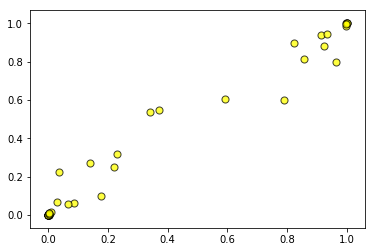

In [76]:
# Plot and show scatter
rural_plot = plt.scatter(X_train_scaled[0], X_train_scaled[1], marker="o", facecolors="yellow", edgecolors="black",
            s=50, alpha=.75)
# plt.scatter(X_train_scaled[:, 0], y_train_categorical[:, 0])
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# confirmed = plt.bar(X_train_scaled[:,0], y_train_categorical[:,0], color='r', alpha=0.1, align="center")
# false_positive = plt.bar(X_train_scaled[1], y_train_categorical[2], color='b', alpha=0.1, align="center")
# plt.show()

In [77]:
# y_train_categorical[:,2]
X_train_scaled[0]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.71702420e-01, 1.75318820e-01, 8.24681180e-01, 2.31244228e-01,
       8.68050179e-02, 9.13194982e-01, 1.90585879e-03, 3.48024316e-03,
       9.96795347e-01, 3.57302386e-02, 6.43564356e-02, 9.35643564e-01,
       9.71522234e-04, 9.16109110e-04, 9.99083891e-01, 2.15476020e-05,
       9.70425139e-06, 9.99992956e-01, 7.13550600e-03, 3.01437183e-08,
       3.31754496e-08, 9.99999984e-01, 3.86650611e-04, 0.00000000e+00,
       1.40007556e-01, 2.18934911e-01, 9.22814983e-01, 8.58476190e-01,
       2.78532609e-02, 9.65243297e-01, 3.08497866e-03, 1.72252274e-03,
       9.99431736e-01, 5.91554050e-01, 3.39079111e-01, 7.91655570e-01])

In [78]:
# Create a kmeans model using k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X_train)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train)

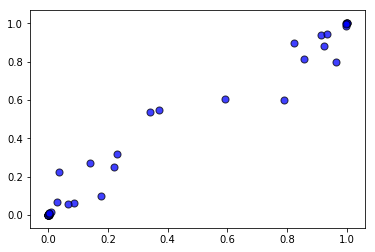

In [79]:
# Plot the clusters
plt.scatter(X_train_scaled[0], X_train_scaled[1], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=.75)
# plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [80]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [81]:
# Show the array of the centers
centers

array([[ 1.55067155e-01,  2.42521368e-01,  1.99023199e-01,
         1.22710623e-01,  5.54069587e+01,  1.85387246e-03,
        -1.85387246e-03,  1.64260892e+02,  9.35142862e-03,
        -9.35142862e-03,  7.03720330e-01,  2.02697135e+00,
        -3.30382265e-01,  5.47134918e+00,  3.18005426e-01,
        -3.18005426e-01,  2.43542763e+04,  1.36923779e+02,
        -1.36923779e+02,  6.25629563e+01,  1.68716590e+01,
        -1.75996123e+01,  1.08320437e+03,  3.79174022e+03,
         2.60639068e+03, -2.06173926e+03,  2.77613828e+02,
         1.24252137e+00,  5.70156548e+03,  1.44448718e+02,
        -1.61935287e+02,  4.31711813e+00,  1.20414530e-01,
        -1.40156746e-01,  1.61371749e+00,  3.46261447e-01,
        -3.60755495e-01,  2.92061027e+02,  4.38801233e+01,
         1.42789139e+01],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00,
         5.00000000e-01,  6.17810347e-01,  1.29560000e-05,
        -1.29560000e-05,  1.31853000e+02,  1.19700000e-02,
        -1.19700000e-02,  2.87

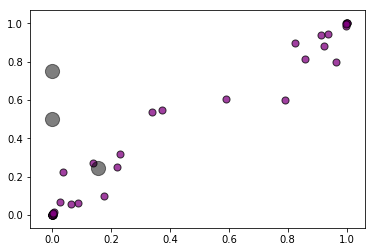

In [82]:
# Plot the clusters and the centers
# plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(X_train_scaled[0], X_train_scaled[1], marker="o", facecolors="purple", edgecolors="black",
            s=50, alpha=.75)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()